# Setup

In [ ]:
# install main library YFinance
!pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# Question 1: [Macro] Average growth of GDP in 2023

In [ ]:
start = "2022-01-01"
end = "2023-12-31"

In [ ]:
gdpc = pdr.DataReader("GDPC1", "fred", start=start, end=end)

In [ ]:
gdpc['gdpc_us_yoy'] = gdpc.GDPC1/gdpc.GDPC1.shift(4)-1
gdpc_us_yoy_avg = round(gdpc.gdpc_us_yoy.sum()*100/4,1)

In [ ]:
gdpc_us_yoy_avg

2.5

# Question 2. [Macro] Inverse "Treasury Yield"

In [ ]:
start = "2000-01-01"
end = date.today()

In [ ]:
dgs2 = pdr.DataReader("DGS2", "fred", start=start, end=end)
dgs10 = pdr.DataReader("DGS10", "fred", start=start, end=end)

In [ ]:
dgs = pd.merge(dgs10, dgs2, how="left", on="DATE")

In [ ]:
dgs["delta"] = dgs["DGS10"] - dgs["DGS2"]

In [ ]:
answer = round(dgs.delta.min(),1)
answer

-1.1

<Axes: xlabel='DATE'>

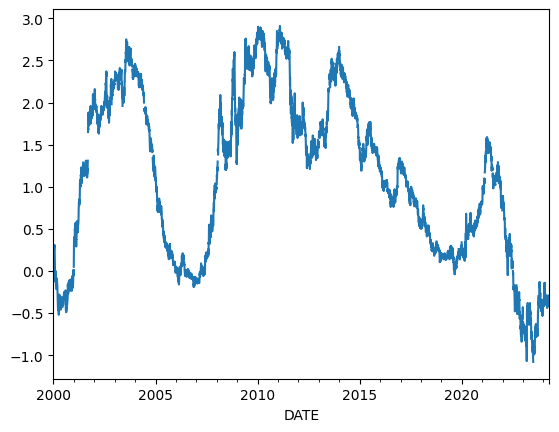

In [ ]:
dgs.delta.plot.line()

# Question 3. [Index] Which Index is better recently?

In [ ]:
start = "2019-04-09"
end = "2024-04-09"

## S&P500

In [ ]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500 = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
snp500_date = snp500.reset_index()

In [ ]:
snp500_date_5y_start = snp500_date[snp500_date.Date == start]["Adj Close"].max()
snp500_date_5y_end = snp500_date[snp500_date.Date == end]["Adj Close"].max()

In [ ]:
snp500_date_5y_growth = round((snp500_date_5y_end/snp500_date_5y_start-1)*100, 0)
snp500_date_5y_growth

81.0

## IPC MX

In [ ]:
# https://finance.yahoo.com/quote/%5EMXX/
# Mexico - Delayed Quote • MXN
ipcm = yf.download(tickers = "^MXX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ipcm_date = ipcm.reset_index()

In [ ]:
ipcm_date_5y_start = ipcm_date[ipcm_date.Date == start]["Adj Close"].max()
ipcm_date_5y_end = ipcm_date[ipcm_date.Date == end]["Adj Close"].max()

In [ ]:
ipcm_date_5y_growth = round((ipcm_date_5y_end/ipcm_date_5y_start-1)*100, 0)
ipcm_date_5y_growth

28.0

# Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks

In [ ]:
start = "2023-01-01"
end = "2023-12-31"

In [ ]:
def adjcalc(ticker):
  df = yf.download(tickers = ticker, start=start, end=end, interval = "1d")
  lrr = (df["Adj Close"].max() - df["Adj Close"].min())/df["Adj Close"].max()
  return lrr

In [ ]:
tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

lrrs = []

for ticker in tickers:
  lrr = adjcalc(ticker)
  lrrs.append(lrr)

In [ ]:
lrrs

[0.21393076385731552,
 0.20775750091289963,
 0.37244419224463476,
 0.4242066914981641,
 0.3924520921912013,
 0.28249927707093897]

In [ ]:
lrr_max = round(max(lrrs),2)

In [ ]:
lrr_max

0.42

# Question 5. [Stocks] Dividend Yield

In [ ]:
def divyld(ticker):
  start = "2023-01-01"
  end = "2023-12-31"

  # get sum of dividends
  div = yf.Ticker(ticker)
  div1 = div.get_dividends()
  div2 = div1[(div1.index >= start) & (div1.index <= end)].sum()

  # get adjusted close price of the last trading day in 2023
  df = yf.download(tickers = ticker, start=start, end=end, interval = "1d")
  adjCl = df["Adj Close"].iloc[-1]

  divYld = round((div2*100)/adjCl,1)
  return divYld

In [ ]:
def finCalc():
  tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

  divYlds = []

  for ticker in tickers:
    divYld = divyld(ticker)
    divYlds.append(divYld)

  divYld_max = max(divYlds)
  return divYld_max

In [ ]:
divYld_max = finCalc()
divYld_max

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


2.8

# Question 6. [Exploratory] Investigate new metrics

## Currency - EURUSD=X

In [ ]:
"""
Currency might be helpful if I hold my cash assets in different currencies and would like to make profits by trading those currencies.
Moreover, it might be helpful if I hold my cash in EUR and would like to invest in funds nominated in USD and the broker does not provide currency conversion or provides a worse exchange rate, for example.
Finally, weaker/stronger currency influences some macroeconomic indicators like exports/imports that might weaken or strenghthen an economy (recent Japan's example).
"""

In [ ]:
start = "2023-01-01"
end = "2023-12-31"

In [ ]:
df = yf.download(tickers = "EURUSD=X", start=start, end=end, interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2023-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       260 non-null    float64
 1   High       260 non-null    float64
 2   Low        260 non-null    float64
 3   Close      260 non-null    float64
 4   Adj Close  260 non-null    float64
 5   Volume     260 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973,0
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,0
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,0
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,0


<Axes: xlabel='Date'>

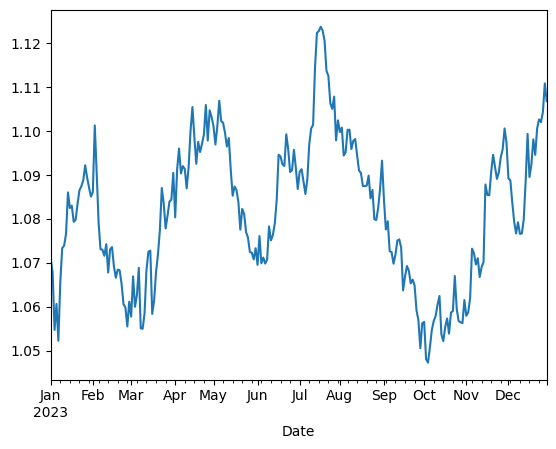

In [ ]:
df["Adj Close"].plot.line()

## Oil & Gas prices in Europe

In [ ]:
"""
Oil & gas prices influence revenues & therefore prices of the oil & gas companies.
Moreover, oil & gas prices impact economies that are dependent on those commodities with different degree and direction of impact (e.g. US vs Germany).
Thus, it might be important to monitor oil & gas prices for creating more accurate trading strategies for bonds, stocks and commodities.
"""

In [ ]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start, end=end)

In [ ]:
oil_brent.info()
oil_brent.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2023-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DCOILBRENTEU  251 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


,DCOILBRENTEU
DATE,
2023-01-02,NaN
2023-01-03,80.36
2023-01-04,75.31
2023-01-05,76.73
2023-01-06,76.41


<Axes: xlabel='DATE'>

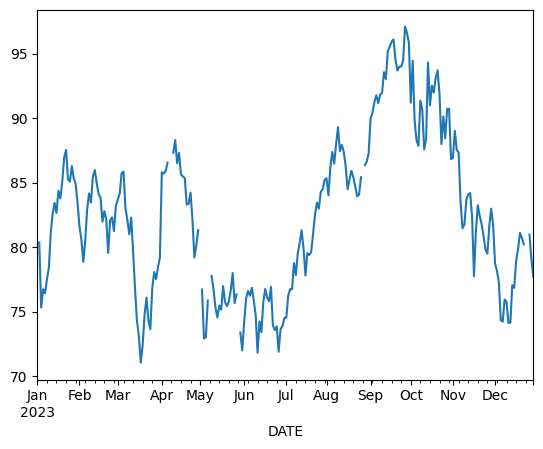

In [ ]:
oil_brent.DCOILBRENTEU.plot.line()

In [ ]:
# Gas Prices in Europe (PNGASEUUSDM)
# https://fred.stlouisfed.org/series/PNGASEUUSDM
gas = pdr.DataReader("PNGASEUUSDM", "fred", start=start, end=end)

In [ ]:
gas.info()
gas.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2023-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PNGASEUUSDM  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


,PNGASEUUSDM
DATE,
2023-01-01,19.886187
2023-02-01,16.737259
2023-03-01,13.870440
2023-04-01,13.683987
2023-05-01,9.970049


<Axes: xlabel='DATE'>

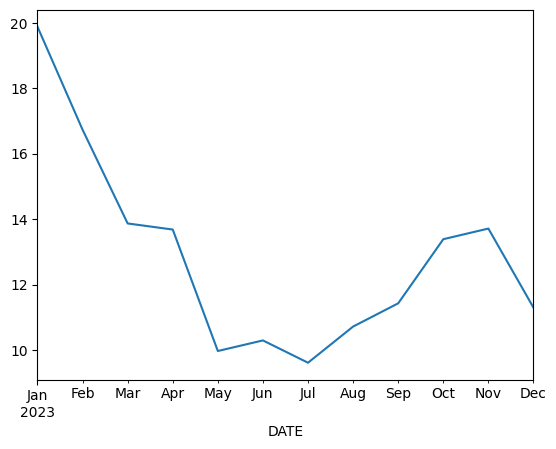

In [ ]:
gas.PNGASEUUSDM.plot.line()

## Other ideas

In [ ]:
"""
currency exchange - weakening currency as the Yen fell to a 34-year low (a weaker currency helps to boost exports) [https://simplywall.st/article/key-takeaways-from-q1-2024]
interest rates - might slow down development of companies; The index is just above the lowest levels of the last year, but interest rates are still weighing on consumer sentiment in Australia. [https://simplywall.st/article/key-takeaways-from-q1-2024]
inflation rates - might influence prices of stocks
price to earnings ration [https://simplywall.st/article/key-takeaways-from-q1-2024]
earnings vs revenues vs market cap
oil price - for companies in the energy sector
trade balance
FED Rate - code snippet 3 - influences goverment bonds
"""

# Question 7. [Exploratory] Time-driven strategy description around earnings releases

In [ ]:
"""
We could use the earnings data from the calendar as follows: 1) choose companies of interest; 2) look at the historical surprises to find any patterns; 3) compare the estimates from the previous date to the future one to see the expectation of the change's direction (growing vs falling); 4) try to use 2 & 3 to predict an upcoming reported estimate; 5) we might be able to incorporate the insights from 3 & 4 to anticipate the price change of a stock after the earnings release date.
"""